In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Stochastic Gradient Descent 
The first thing that we are going to do is practice implementing the stochastic gradient descent algorithm. Before we can start doing any calculations, we need to initialize our data for linear regression


In [1297]:
## Initialize the data
x = np.random.uniform(0,6,1000)
epsilon = np.random.normal(0,2,1000) ## the noise term
y = 3*x+1 + epsilon ## The model

<Figure size 640x480 with 0 Axes>

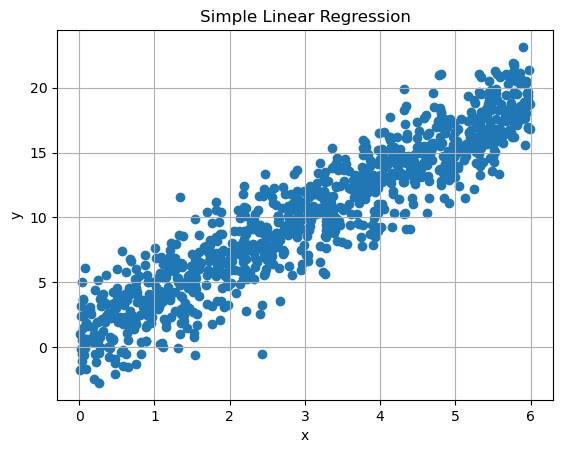

In [945]:
plt.clf()
plt.figure()
plt.scatter(x,y)
plt.title("Simple Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

We are now going to implement stochastic gradient descent. Remember it takes the form 
\begin{equation}
\theta_{t+1} = \theta_t - \alpha \sum_{i\in \mathcal{B}_t} \frac{\partial L_i\left[\theta_t\right]}{\partial\theta}
\end{equation}
Which requires us to define a loss function $L_i$. The obvious choice for a loss function is the $L_2$ distance
$$L(\theta) = (\boldsymbol{y-X\theta})^T(\boldsymbol{y-X\theta})$$

In [1299]:
## Rewrite the data in matrix form 
bias = np.ones(1000)
X = np.vstack((bias,x)).T ## We transpose it so that the columns represent X_i
y = y.reshape(-1,1) ## This will reshape the vector to being (1000,1) to make matrix derivatives possible 
print("the shape of the data matrix is:",X.shape) ## In this case, it should be (1000,2)
print("the shape of the prediction vector y is:",y.shape) ## Check the size of y too

the shape of the data matrix is: (1000, 2)
the shape of the prediction vector y is: (1000, 1)


In [1104]:
## Now we have to also initialize the weight vector. We only have 2 weights; the bias and the intercept. 
w = np.array([1,1.]).reshape(-1,1)
print("the shape of the weight vector is:",w.shape) ## Double checking 

## we need to compute the gradient. With regular gradient descent, we know that the gradient is 
n = len(x) ## For normalization purposes

## Now we do gradient descent with alpha = .001
alpha = .001 
loss = []
for i in range(10000):
    grad = 1/n * (2*X.T)@(X@w - y) 
    w += -alpha * grad
    loss += [(y-X@w).T @ (y-X@w)]

## Let us print out the weights 
print('the weight vector is:',w) 

the shape of the weight vector is: (2, 1)
the weight vector is: [[0.90918908]
 [3.01486405]]


In [1105]:
## create a linearly spaced line 
xlin = np.linspace(0,6,1000)
Xpred = np.vstack((bias,xlin)).T
ypred = Xpred@w

<Figure size 640x480 with 0 Axes>

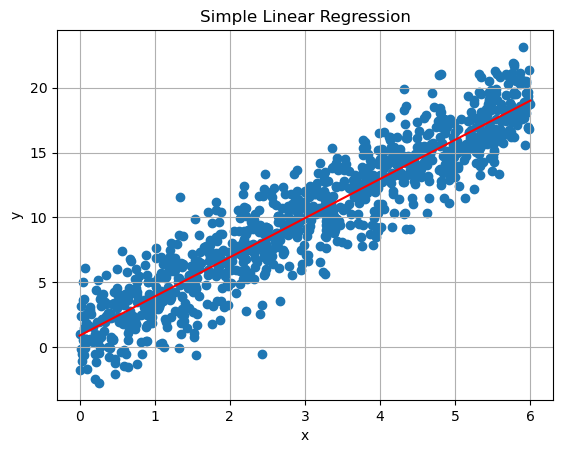

In [1108]:
## Plot the line 
plt.clf()
plt.figure()
plt.scatter(x,y)
plt.plot(xlin,ypred,color='red')
plt.title("Simple Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

In [1322]:
## Now implement stochastic gradient descent. With only 2 weights, it probably won't be very different
## Since we know we have 1000 data points, let's truncate the feature matrix to only 50 data points.

## 1 batch is 50 indices, and 1 epoch is when 20 different batches have been used 
epochs = 500
batchsize = 50
alpha = .001

def SGD(X,y,epochs,batchsize,alpha):
    num_rows = len(y)
    w = np.array([-1,-5.]).reshape(-1,1) ## Don't forget to initialize the weights!
    lossSGD = [] ## a list to keep track of the loss function at each step
    wsteps = [] ## a list to keep track of the weights at each step
    
    ## Begin the for loop
    for epoch in range(epochs): 
        if epoch == 0:
            wsteps.append(w.flatten())
        
        batchnumber = 0 ## initialize to 0 as we run through all of the indices
        random_indices = np.random.choice(num_rows, size=num_rows, replace=False) ## random indices 
        
        for batch in range(int(num_rows/batchsize)):
            batchnumber += batchsize
            minibatchindex = random_indices[int(batchnumber-batchsize):int(batchnumber)]
            
            truncatedX = X[minibatchindex, :] ## truncating the feature matrix using the random indices
            truncatedy = y[minibatchindex, :] ## truncating the output vector using the random indices
            
            grad = 1/batchsize * (2*truncatedX.T)@(truncatedX@w - truncatedy) ## compute the gradient
            w += -alpha * grad ## update the gradient
            
            wsteps.append(w.flatten())
            lossSGD += [(truncatedy-truncatedX@w).T @ (truncatedy-truncatedX@w)]

        ## Uncomment this if you want to see the loss at each epoch
        #print('epoch:',str(epoch+1)+"/"+str(epochs)," loss="+str(lossSGD[-1]))
    return w, wsteps, lossSGD

In [1142]:
w, wsteps, lossSGD = SGD(X,y,epochs,batchsize,alpha)
print('the weight vector is:',w) 

the weight vector is: [[0.91330827]
 [3.01170289]]


<Figure size 640x480 with 0 Axes>

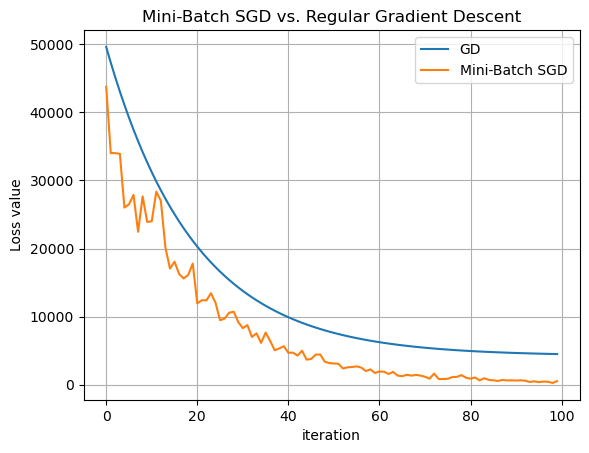

In [1144]:
plt.clf()
plt.figure()
loss = np.array(loss).flatten()
lossSGD = np.array(lossSGD).flatten()
plt.plot(loss[:100],label='GD')
plt.plot(lossSGD[:100],label='Mini-Batch SGD')
plt.grid()
plt.title("Mini-Batch SGD vs. Regular Gradient Descent")
plt.ylabel("Loss value")
plt.xlabel("iteration")
plt.legend()
plt.savefig("SGDvsGD.png")

<Figure size 640x480 with 0 Axes>

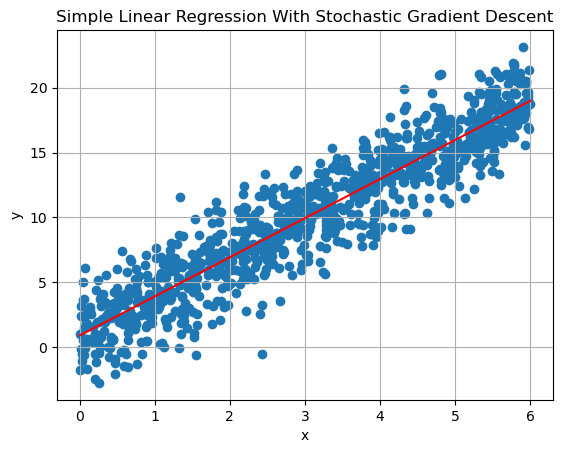

In [1146]:
## create a linearly spaced line 
plt.clf()
plt.figure()
xlin = np.linspace(0,6,1000)
Xpred = np.vstack((bias,xlin)).T
ypred = Xpred@w

## Plot the line 
plt.scatter(x,y)
plt.plot(xlin,ypred,color='red')
plt.title("Simple Linear Regression With Stochastic Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

Text(0, 0.5, '$\\theta_1$')

<Figure size 640x480 with 0 Axes>

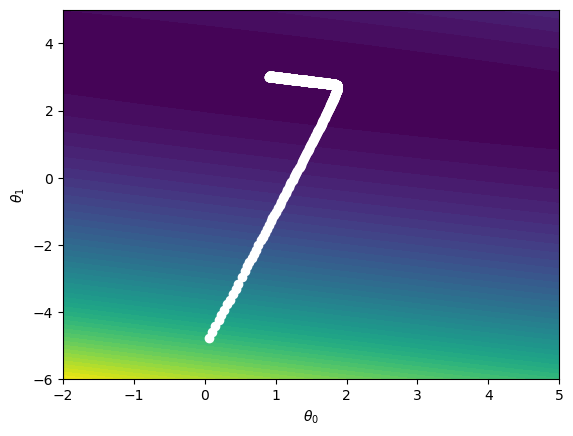

In [1148]:
## Now let us plot what the loss surface looks like and what the gradient looks like at each step
plt.clf()
plt.figure()

w1 = np.linspace(-2, 5, 100)
w2 = np.linspace(-6, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
lossfunc = np.array([(y[i]-W1-W2*x[i])**2 for i in range(1000)])
Z = np.sum(lossfunc,axis=0) # Example surface function

wstepsx, wstepsy = zip(*wsteps)

plt.contourf(W1, W2, Z, cmap='viridis',levels=50)
plt.plot(wstepsx,wstepsy,'-o',color='white')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r"$\theta_1$")

## SGD With Momentum
 We have the usual SGD. Now what we need to do is initialize the momentum term. Remember that the initialization of the momentum is 
 $$\boldsymbol{m}_{t+1}=\beta \boldsymbol{m}_{t} + (1-\beta)\sum_{i\in \mathcal{B}_t}\frac{\partial L_i[\theta_t]}{\partial \theta}$$
 and then the updated SGD is 
 $$\theta_{t+1} = \theta_t - \alpha \left(\beta \boldsymbol{m}_{t} + (1-\beta)\sum_{i\in \mathcal{B}_t}\frac{\partial L_i[\theta_t]}{\partial \theta}\right)$$

In [1192]:
## Define the momentum SGD function
def momentumSGD(X, y,epochs,batchsize,alpha,beta):
    """This is the SGD algorithm with momentum. It takes in a series of parameters 
    that define the algorithm (like number of epochs, batchsize, etc) and returns 
    the final weights, the loss function at each step, and the values of weights 
    at each step"""
    
    num_rows = len(y)
    lossSGD = [] ## a list to keep track of the loss function at each step
    wsteps = [] ## a list to keep track of the weights at each step
    w = np.array([3,-5.]).reshape(-1,1) ## Don't forget to initialize the weights!
    m = np.zeros(len(w)).reshape(-1,1)
    ## Begin the for loop
    for epoch in range(epochs):
        if epoch == 0:
            wsteps.append(w.flatten())
        
        batchnumber = 0 ## initialize to 0 as we run through all of the indices
        random_indices = np.random.choice(num_rows, size=num_rows, replace=False) ## random indices 
        
        for batch in range(int(num_rows/batchsize)):
            batchnumber += batchsize
            minibatchindex = random_indices[int(batchnumber-batchsize):int(batchnumber)]
            
            truncatedX = X[minibatchindex, :] ## truncating the feature matrix using the random indices
            truncatedy = y[minibatchindex, :] ## truncating the output vector using the random indices
            
            grad = 1/batchsize * (2*truncatedX.T)@(truncatedX@w - truncatedy) ## compute the gradient
            
            ##This is where we will be adding the momentum 
            m = beta * m + (1-beta)*grad
            w += -alpha * m ## update the gradient with the momentum now
            
            wsteps.append(w.flatten())
            lossSGD += [(truncatedy-truncatedX@w).T @ (truncatedy-truncatedX@w)]

        ## We can also implement early stopping as to not waste computational resources. 
        ## Just comment it out if you don't want to use it 
        
        #if np.abs(lossSGD[-1]-lossSGD[-2])/lossSGD[-2] <= .01:
            #print('Stable minimum has been found at epoch:',epoch,"!")
            #break
            
         ## You can uncomment this if you want to see the loss at each epoch.    
        #print('epoch:',str(epoch+1)+"/"+str(epochs)," loss="+str(lossSGD[-1]))
    return w, wsteps, lossSGD

In [1497]:
## Initialize all necessary parameters
beta = 0.1 ## the beta parameter controls the smoothness. We can play around with it later
epochs = 10
batchsize = 50
alpha = .01

## Call the function
w,wsteps,lossSGD=momentumSGD(X,y,epochs,batchsize,alpha,beta)
print(w)

[[2.47772518]
 [2.60701638]]


<Figure size 640x480 with 0 Axes>

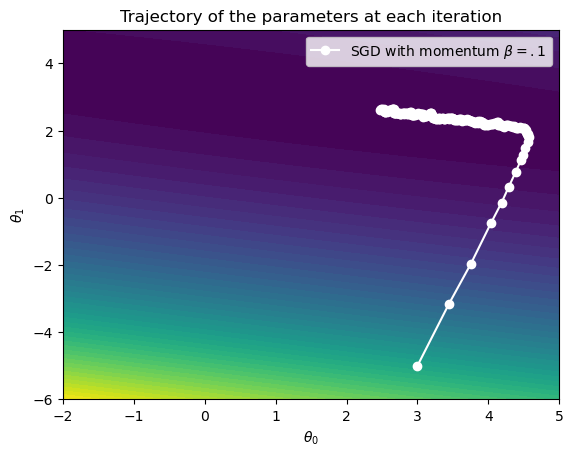

In [1501]:
## Now let us plot what the loss surface looks like and what the gradient looks like at each step
plt.clf()
plt.figure()
w1 = np.linspace(-2, 5, 100)
w2 = np.linspace(-6, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
lossfunc = np.array([(y[i]-W1-W2*x[i])**2 for i in range(1000)])
Z = np.sum(lossfunc,axis=0) # Example surface function

wstepsx, wstepsy = zip(*wsteps)

plt.contourf(W1, W2, Z, cmap='viridis',levels=50)
plt.plot(wstepsx,wstepsy,'-o',color='white',label=r'SGD with momentum $\beta = .1$')
plt.xlim(-2,5)
plt.ylim(-6,5)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r"$\theta_1$")
plt.title("Trajectory of the parameters at each iteration")
plt.legend()
plt.savefig("NonNorm.png")

In [1206]:
## We want to plot what the trajectory looks like for different beta values. Let us create a dictionary 
trajectories = {} ## Initialize the dictionary
betas = [round(.1*i,3) for i in range(10)] ## You can make any betas you want

## Start the for loop
for beta in betas:
    w,wsteps,lossSGD=momentumSGD(X,y,epochs=20,batchsize=100,alpha=.01,beta=beta)
    trajectories[str(beta)] = wsteps

<Figure size 640x480 with 0 Axes>

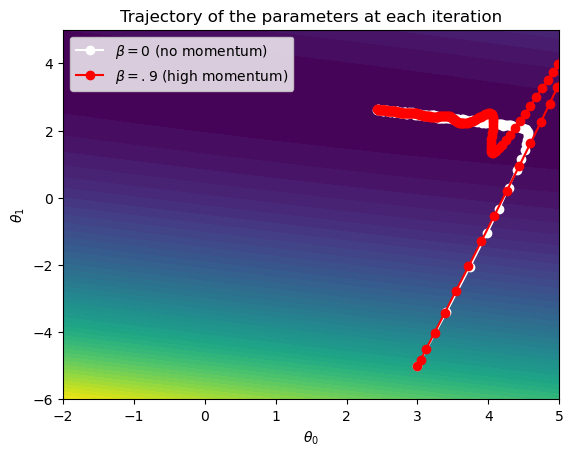

In [1208]:
## Let us plot the difference betweeen no momentum and high momentum 
beta0 = trajectories['0.0']
beta9 = trajectories['0.9']
plt.clf()
plt.figure()
w1 = np.linspace(-2, 5, 100)
w2 = np.linspace(-6, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
lossfunc = np.array([(y[i]-W1-W2*x[i])**2 for i in range(1000)])
Z = np.sum(lossfunc,axis=0) # Example surface function

w0stepsx, w0stepsy = zip(*beta0)
w9stepsx, w9stepsy = zip(*beta9)

plt.contourf(W1, W2, Z, cmap='viridis',levels=50)
plt.plot(w0stepsx,w0stepsy,'-o',color='white',label=r"$\beta=0$ (no momentum)")
plt.plot(w9stepsx,w9stepsy,'-o',color='red',label=r"$\beta=.9$ (high momentum)")
plt.xlim(-2,5)
plt.ylim(-6,5)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r"$\theta_1$")
plt.title("Trajectory of the parameters at each iteration")
plt.legend()
plt.savefig("Lossfuncsurf.png")
plt.show()


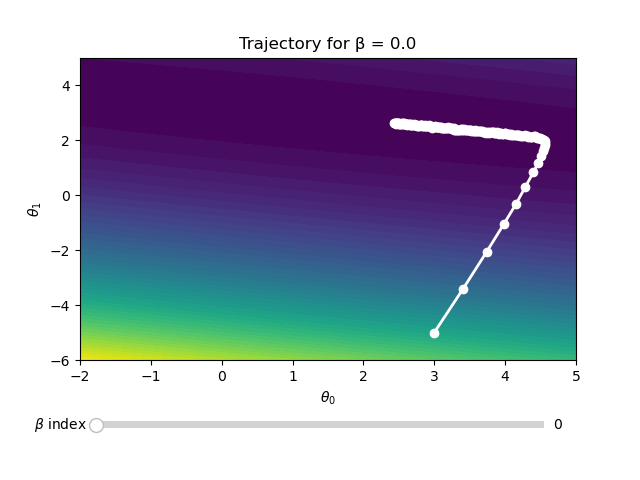

In [1210]:
%matplotlib widget
from matplotlib.widgets import Slider


fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# draw your contour once
ax.contourf(W1, W2, Z, cmap='viridis', levels=50)
ax.set_xlim(-2, 5)
ax.set_ylim(-6, 5)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

# prepare betas list and initial trajectory
beta_values = list(betas)
init_idx = 0
init_beta = beta_values[init_idx]
x0, y0 = zip(*trajectories[str(init_beta)])
traj_line, = ax.plot(x0, y0, '-o', lw=2, color='white')
ax.set_title(f"Trajectory for β = {init_beta}")

# slider axis
ax_slider = plt.axes([0.15, 0.1, 0.7, 0.03])
slider = Slider(
    ax=ax_slider,
    label=r'$\beta$ index',
    valmin=0,
    valmax=len(beta_values)-1,
    valinit=init_idx,
    valstep=1,
    valfmt='%d'
)
slider.ax.set_xticks(np.arange(len(beta_values)))

# update function
def update(val):
    idx = int(val)
    beta = beta_values[idx]
    x, y = zip(*trajectories[str(beta)])
    traj_line.set_data(x, y)
    ax.set_title(f"Trajectory for β = {beta}")
    fig.canvas.draw_idle()

slider.on_changed(update)

# This is here so that you can change the slider with your arrow keys. Otherwise, matplotlib won't let you :( 
def on_key(event):
    if event.key not in ('left', 'right'):
        return
    delta = -1 if event.key == 'left' else +1
    new_idx = int(slider.val) + delta
    # clamp to valid range
    new_idx = max(0, min(new_idx, len(beta_values)-1))
    slider.set_val(new_idx)  # this will call update()

fig.canvas.mpl_connect('key_press_event', on_key)

plt.show()


## Nestorov Accelerated Momentum
On top of adding momentum, we can compute the monentum ahead of time. This has the interpretation of an acceleration. 
To remind ourselves what that is, 
$$\theta_{t+1} = \theta_t - \alpha \left(\beta \boldsymbol{m}_{t} + (1-\beta)\sum_{i\in \mathcal{B}_t}\frac{\partial L_i[\theta_t+\alpha\cdot \boldsymbol{m}_t]}{\partial \theta}\right)$$
We only need to make slight modifications to the momentum 

In [1347]:
%matplotlib inline
## Define the momentum SGD function
def NestorovSGD(X, y,epochs,batchsize,alpha,beta):
    """This is the SGD algorithm with but with Nestorov. It takes in a series of parameters 
    that define the algorithm (like number of epochs, batchsize, etc) and returns 
    the final weights, the loss function at each step, and the values of weights 
    at each step"""
    
    num_rows = len(y)
    lossSGD = [] ## a list to keep track of the loss function at each step
    wsteps = [] ## a list to keep track of the weights at each step
    w = np.array([3,-5.]).reshape(-1,1) ## Don't forget to initialize the weights!
    m = np.zeros(len(w)).reshape(-1,1)
    
    ## Begin the for loop
    for epoch in range(epochs):
        if epoch == 0:
            wsteps.append(w.flatten())
        
        batchnumber = 0 ## initialize to 0 as we run through all of the indices
        random_indices = np.random.choice(num_rows, size=num_rows, replace=False) ## random indices 
        
        for batch in range(int(num_rows/batchsize)):
            batchnumber += 50
            minibatchindex = random_indices[int(batchnumber-50):int(batchnumber)]
            
            truncatedX = X[minibatchindex, :] ## truncating the feature matrix using the random indices
            truncatedy = y[minibatchindex, :] ## truncating the output vector using the random indices
            
            grad = 1/batchsize * (2*truncatedX.T)@(truncatedX@(w+alpha*m) - truncatedy) ## modified to gradient so that it computes ahead
            
            ##This is where we will be adding the momentum 
            m = beta * m + (1-beta)*grad
            w += -alpha * m ## update the gradient with the momentum now
            
            wsteps.append(w.flatten())
            lossSGD += [(truncatedy-truncatedX@w).T @ (truncatedy-truncatedX@w)]

        ## We can also implement early stopping as to not waste computational resources. 
        ## Just comment it out if you don't want to use it 
        
        #if np.abs(lossSGD[-1]-lossSGD[-2])/lossSGD[-2] <= .01:
            #print('Stable minimum has been found at epoch:',epoch,"!")
            #break
            
            
        #print('epoch:',str(epoch+1)+"/"+str(epochs)," loss="+str(lossSGD[-1]))
    return w, wsteps, lossSGD

epoch: 1/20  loss=[[290.16054517]]
epoch: 2/20  loss=[[313.7114846]]
epoch: 3/20  loss=[[257.10884992]]
epoch: 4/20  loss=[[368.44347409]]
epoch: 5/20  loss=[[255.55219873]]
epoch: 6/20  loss=[[314.85085383]]
epoch: 7/20  loss=[[251.8313592]]
epoch: 8/20  loss=[[166.84425402]]
epoch: 9/20  loss=[[202.74848129]]
epoch: 10/20  loss=[[186.28339587]]
epoch: 11/20  loss=[[262.93433293]]
epoch: 12/20  loss=[[242.56659076]]
epoch: 13/20  loss=[[200.95379957]]
epoch: 14/20  loss=[[205.67483564]]
epoch: 15/20  loss=[[239.22039831]]
epoch: 16/20  loss=[[166.85413229]]
epoch: 17/20  loss=[[234.38670798]]
epoch: 18/20  loss=[[260.73584121]]
epoch: 19/20  loss=[[226.73649511]]
epoch: 20/20  loss=[[281.60470727]]


<Figure size 640x480 with 0 Axes>

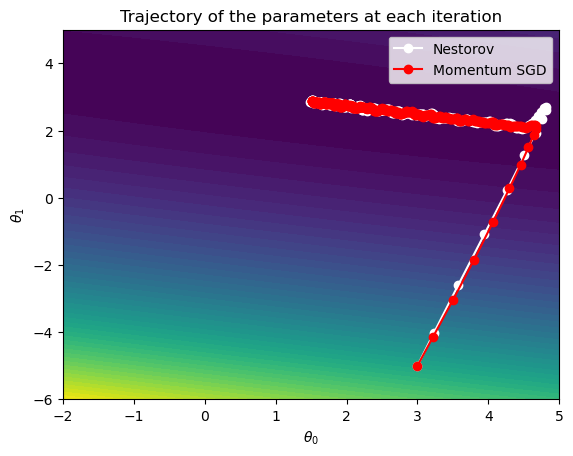

In [1221]:
## Now let us plot what the loss surface looks like and what the gradient looks like at each step
## Initialize all necessary parameters
beta = 0.5 ## the beta parameter controls the smoothness. We can play around with it later
epochs = 20
batchsize = 50
alpha = .01

## Call the function
w,wstepsnest,lossSGD=NestorovSGD(X,y,epochs,batchsize,alpha,beta)
w,wstepsmoment,lossSGD=momentumSGD(X,y,epochs,batchsize,alpha,beta)

plt.clf()
plt.figure()
w1 = np.linspace(-2, 5, 100)
w2 = np.linspace(-6, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
lossfunc = np.array([(y[i]-W1-W2*x[i])**2 for i in range(1000)])
Z = np.sum(lossfunc,axis=0) # Example surface function

wneststepsx, wneststepsy = zip(*wstepsnest)
wmomentstepsx, wmomentstepsy = zip(*wstepsmoment)

plt.contourf(W1, W2, Z, cmap='viridis',levels=50)
plt.plot(wneststepsx, wneststepsy,'-o',color='white',label="Nestorov")
plt.plot(wmomentstepsx, wmomentstepsy,'-o',color='red',label="Momentum SGD")
plt.xlim(-2,5)
plt.ylim(-6,5)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r"$\theta_1$")
plt.title("Trajectory of the parameters at each iteration")
plt.legend()
plt.savefig("nestorov.png")

## ADAM Optimizer
The last modification that we are going to make is normalize the gradients so that each direction has equal effect and then implement 
a learning rate schedule. First, normalizations will need 
$$\boldsymbol{m}_{t+1} = \frac{\partial L[\theta]}{\partial \theta}$$
$$\boldsymbol{v}_{t+1} = \left(\frac{\partial L[\theta]}{\partial \theta}\right)^2$$
and then the weight update is 
$$\theta_{t+1} = \theta_{t} -\alpha \frac{\boldsymbol{m}_{t+1}}{\sqrt{\boldsymbol{v_{t+1}}}+\epsilon}$$
This makes it so that the gradient step will just be almost going straight to the center

In [1230]:
## Define the momentum SGD function
def NormGrad(X, y,epochs,alpha):
    """Normalized gradient descent algorithm. It takes in a series of parameters 
    that define the algorithm (like number of epochs) and returns 
    the final weights, the loss function at each step, and the values of weights 
    at each step. This is a full batch algorithm"""
    
    num_rows = len(y)
    batchsize = len(y)
    if num_rows%batchsize != 0:
        return "Error: Batchsize incompatible with matrix (hush I'll fix it later) "
        
    lossSGD = [] ## a list to keep track of the loss function at each step
    wsteps = [] ## a list to keep track of the weights at each step
    w = np.array([-1,-5.]).reshape(-1,1) ## Don't forget to initialize the weights!
    m = np.zeros(len(w)).reshape(-1,1)
    v = np.zeros(len(w)).reshape(-1,1)
    e = 10e-20 ## Here just to make sure we don't get division by 0
    
    ## Begin the for loop
    for epoch in range(epochs):
        if epoch == 0:
            wsteps.append(w.flatten())
        
        batchnumber = 0 ## initialize to 0 as we run through all of the indices
        random_indices = np.random.choice(num_rows, size=num_rows, replace=False) ## random indices 
        
        for batch in range(int(num_rows/batchsize)):
            batchnumber += batchsize
            minibatchindex = random_indices[int(batchnumber-batchsize):int(batchnumber)]
            
            truncatedX = X[minibatchindex, :] ## truncating the feature matrix using the random indices
            truncatedy = y[minibatchindex, :] ## truncating the output vector using the random indices
            
            grad = 1/batchsize * (2*truncatedX.T)@(truncatedX@w - truncatedy) ## compute the gradient
            
            ##This is where we will be adding the squared gradient
            v = grad**2
            
            w += -alpha * grad/(np.sqrt(v)+e) ## update the gradient with the momentum now
            
            wsteps.append(w.flatten())
            lossSGD += [(truncatedy-truncatedX@w).T @ (truncatedy-truncatedX@w)]

        ## We can also implement early stopping as to not waste computational resources. 
        ## Just comment it out if you don't want to use it 
        
        #if np.abs(lossSGD[-1]-lossSGD[-2])/lossSGD[-2] <= .01:
            #print('Stable minimum has been found at epoch:',epoch,"!")
            #break
            
        ## You can uncomment this if you want to see the loss at each epoch.
        #print('epoch:',str(epoch+1)+"/"+str(epochs)," loss="+str(lossSGD[-1]))
    return w, wsteps, lossSGD

<Figure size 640x480 with 0 Axes>

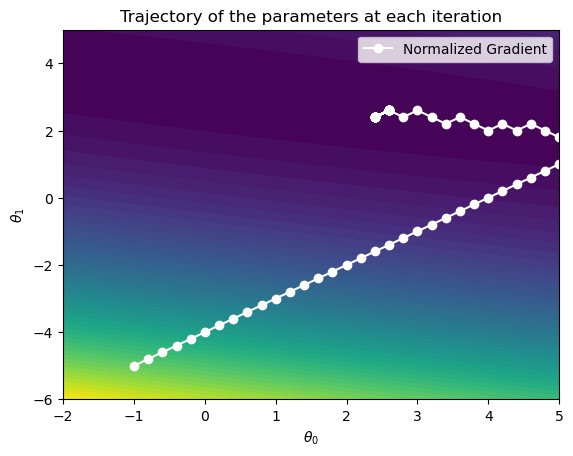

In [1289]:
## Now let us plot what the loss surface looks like and what the gradient looks like at each step
## Initialize all necessary parameters
epochs = 100
alpha = .2

## Call the function
w,wstepsnorm,lossSGD=NormGrad(X,y,epochs,alpha)

plt.clf()
plt.figure()
w1 = np.linspace(-2, 5, 100)
w2 = np.linspace(-6, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
lossfunc = np.array([(y[i]-W1-W2*X.T[1][i])**2 for i in range(100)])
Z = np.sum(lossfunc,axis=0) # Example surface function

wnormstepsx, wnormstepsy = zip(*wstepsnorm)

plt.contourf(W1, W2, Z, cmap='viridis',levels=50)
plt.plot(wnormstepsx, wnormstepsy,'-o',color='white',label="Normalized Gradient")
plt.xlim(-2,5)
plt.ylim(-6,5)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r"$\theta_1$")
plt.title("Trajectory of the parameters at each iteration")
plt.legend()
plt.savefig("NormGrad.png")

It's a bit hard to see what's going on just because the loss surface has really high anistropy. We can fix this by 
centering the data and scaling it so that the covariance matrix is just the identity. 

In [1293]:
# original data
x = np.random.uniform(0,6,100)
ε = np.random.normal(0,2,100)
y = 1*x + 1 + ε

# 1) Center
x_centered = x - np.mean(x)

# 2) Scale
x_std = x_centered / np.std(x_centered)

# 3) Form new feature matrix
bias = np.ones_like(x_std)
X_center = np.vstack((bias, x_std)).T
y_center = y.reshape(-1,1)

print(r"The covariance matrix is", 
      np.round((X_center.T @ X_center) / len(y_center), 2))
# you should see something very close to [[1, 0], [0, 1]]


The covariance matrix is [[ 1. -0.]
 [-0.  1.]]


<Figure size 640x480 with 0 Axes>

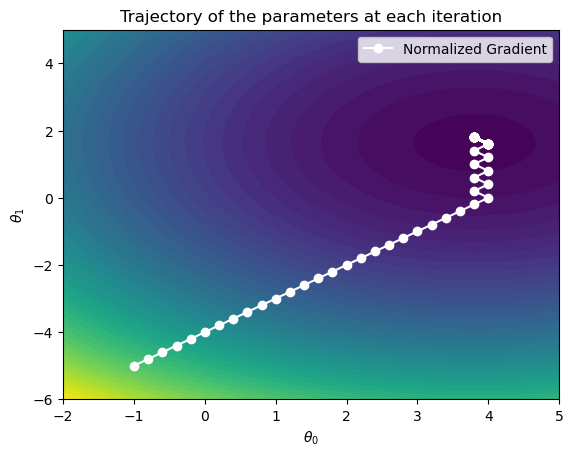

In [1493]:
## Now let us plot what the loss surface looks like and what the gradient looks like at each step
## Initialize all necessary parameters
epochs = 100
alpha = .2

## Call the function
w,wstepsnorm,lossSGD=NormGrad(X_center,y_center,epochs,alpha)

plt.clf()
plt.figure()
w1 = np.linspace(-2, 5, 100)
w2 = np.linspace(-6, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
lossfunc = np.array([(y_center[i]-W1-W2*X_center.T[1][i])**2 for i in range(100)])
Z = np.sum(lossfunc,axis=0) # Example surface function

wnormstepsx, wnormstepsy = zip(*wstepsnorm)

plt.contourf(W1, W2, Z, cmap='viridis',levels=50)
plt.plot(wnormstepsx, wnormstepsy,'-o',color='white',label="Normalized Gradient")
plt.xlim(-2,5)
plt.ylim(-6,5)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r"$\theta_1$")
plt.title("Trajectory of the parameters at each iteration")
plt.legend()
plt.savefig("Normgrad.png")

As we can see, without the implementation of momentum, the step sizes are all the same. We can include a learning rate schedule 
via 
$$\boldsymbol{m}_{t+1} = \beta \boldsymbol{m}_t + (1-\beta)\nabla_{t}(\theta)$$
$$\boldsymbol{v}_{t+1} = \gamma \boldsymbol{v}_t + (1-\gamma)\left(\nabla_{t}(\theta)\right)^2$$
However, as we saw in the book, the weights are vanishing at early times. To avoid this, we need to normalize the momentum by how much 
the weights vanish. 
\begin{equation}
    \tilde{\boldsymbol{m}}_{t+1} = \frac{\boldsymbol{m}_{t+1}}{1-\beta^t}
\end{equation}
\begin{equation}
    \tilde{\boldsymbol{v}} = \frac{\boldsymbol{v}_{t+1}}{1-\gamma^t}
\end{equation}
And finally, our parameter updates will be 
\begin{equation}
    \theta_{t+1} = \theta_t -\alpha\frac{\tilde{\boldsymbol{m}}_{t+1}}{\sqrt{\tilde{\boldsymbol{v}}_{t+1}}+\epsilon}
\end{equation}

In [1302]:
## Define the momentum SGD function
def ADAM(X, y,epochs,batchsize,alpha,beta,gamma):
    """This is the SGD algorithm with momentum. It takes in a series of parameters 
    that define the algorithm (like number of epochs, batchsize, etc) and returns 
    the final weights, the loss function at each step, and the values of weights 
    at each step"""
    num_rows = len(y)
    if num_rows%batchsize != 0:
        return "Error: Batchsize incompatible with matrix (hush I'll fix it later) "
        
    lossSGD = [] ## a list to keep track of the loss function at each step
    wsteps = [] ## a list to keep track of the weights at each step
    w = np.array([-1,-5.]).reshape(-1,1) ## Don't forget to initialize the weights!
    m = np.zeros(len(w)).reshape(-1,1)
    v = np.zeros(len(w)).reshape(-1,1)
    t = 1 ## This is to keep track of iteration so that we can use it in normalizing m and v
    e = 10e-20 ## Here just to make sure we don't get division by 0
    
    ## Begin the for loop
    for epoch in range(epochs):
        if epoch == 0:
            wsteps.append(w.flatten())
        
        batchnumber = 0 ## initialize to 0 as we run through all of the indices
        random_indices = np.random.choice(num_rows, size=num_rows, replace=False) ## random indices 
        
        for batch in range(int(num_rows/batchsize)):
            batchnumber += batchsize
            minibatchindex = random_indices[int(batchnumber-batchsize):int(batchnumber)]
            
            truncatedX = X[minibatchindex, :] ## truncating the feature matrix using the random indices
            truncatedy = y[minibatchindex, :] ## truncating the output vector using the random indices
            
            grad = 1/batchsize * (2*truncatedX.T)@(truncatedX@w - truncatedy) ## compute the gradient
            
            ##This is where we will be adding the momentum 
            m = (beta* m + (1-beta)*grad) #/(1-beta**t)
            v = (gamma*v + (1-gamma)*grad**2) #/(1-gamma**t)
            vhat = v / (1-gamma**t)
            mhat = m/(1-beta**t)
            #v = grad**2
            
            w += -alpha * m/(np.sqrt(v)+e) ## update the gradient with the momentum now
            
            wsteps.append(w.flatten())
            lossSGD += [(truncatedy-truncatedX@w).T @ (truncatedy-truncatedX@w)]

            t += 1 ## Update the tick

        ## We can also implement early stopping as to not waste computational resources. 
        ## Just comment it out if you don't want to use it 
        
        #if np.abs(lossSGD[-1]-lossSGD[-2])/lossSGD[-2] <= .01:
            #print('Stable minimum has been found at epoch:',epoch,"!")
            #break
            
        ## You can uncomment this if you want to see the loss at each epoch.
        #print('epoch:',str(epoch+1)+"/"+str(epochs)," loss="+str(lossSGD[-1]))
    return w, wsteps, lossSGD

<Figure size 640x480 with 0 Axes>

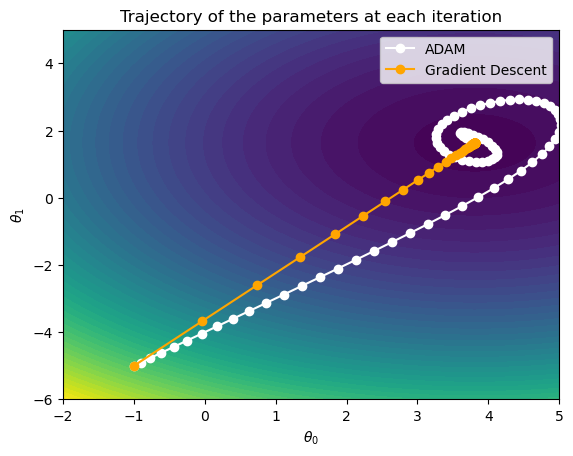

In [1491]:
## Now let us plot what the loss surface looks like and what the gradient looks like at each step
## Initialize all necessary parameters
beta = .9 ## the beta parameter controls the smoothness. We can play around with it later
gamma = .9 ## Set it equal to beta for now, but you are welcome to play around with it.
epochs = 80
batchsize = 100
alpha = .3

## Call the function
w,wstepsADAM,lossSGD=ADAM(X_center,y_center,epochs,batchsize,alpha,beta,gamma)
w,wstepsGD,lossGD=SGD(X_center,y_center,epochs,batchsize,alpha=.1)

plt.clf()
plt.figure()
w1 = np.linspace(-2, 5, 100)
w2 = np.linspace(-6, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
lossfunc = np.array([(y_center[i]-W1-W2*X_center.T[1][i])**2 for i in range(100)])
Z = np.sum(lossfunc,axis=0) # Example surface function

wADAMstepsx, wADAMstepsy = zip(*wstepsADAM)
wstepsx, wstepsy = zip(*wstepsGD)

plt.contourf(W1, W2, Z, cmap='viridis',levels=50)
plt.plot(wADAMstepsx, wADAMstepsy,'-o',color='white',label="ADAM")
plt.plot(wstepsx, wstepsy,'-o',color='orange',label="Gradient Descent")
plt.xlim(-2,5)
plt.ylim(-6,5)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r"$\theta_1$")
plt.title("Trajectory of the parameters at each iteration")
plt.legend()
plt.savefig("ADAM.png")

We can compare the loss values of each method side by side 

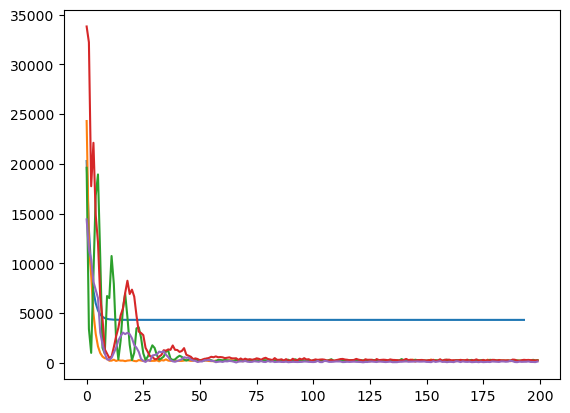

In [1489]:
## Initalize all the parameters
beta = .9 ## the beta parameter controls the smoothness. We can play around with it later
gamma = .9 ## Set it equal to beta for now, but you are welcome to play around with it.
epochs = 200
batchsize = 1000
alpha = .1

## Extract all the losses for each algorithm
w, wstepsGD,lossGD = SGD(X,y,epochs,batchsize,alpha=.01)
wSGD, wstepsSGD,lossSGD = SGD(X,y,epochs,batchsize=50,alpha=.01)
wmoment, wstepsSGDmoment,lossSGDmoment = momentumSGD(X,y,epochs,batchsize=50,alpha=.1,beta=beta)
wnest, wstepsnest,lossnest = NestorovSGD(X,y,epochs,batchsize=50,alpha=.01,beta=beta)
w,wstepsADAM,lossADAM=ADAM(X,y,epochs,batchsize=20,alpha=1,beta=beta,gamma=gamma)
plt.plot(np.array(lossGD).flatten()[6:])
plt.plot(np.array(lossSGD).flatten()[0:len(lossGD)])
plt.plot(np.array(lossSGDmoment).flatten()[0:len(lossGD)])
plt.plot(np.array(lossnest).flatten()[0:len(lossGD)])
plt.plot(np.array(lossADAM).flatten()[0:len(lossGD)])
#plt.yscale('log')

## Weight Initalization
In this section, we will need to rely on TensorFlow or Pytorch to implement the neural network because it would almost be overkill for us to have to rebuild the neural network from scratch. 

In [1652]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader

## Down below, I have created a simple neural network using the Pytorch tutorial. Let us go over what each element does
## To see the effects of gradient explosion/shrinkage, we will need many layers

# Define the neural network class
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # Call the constructor of the parent class (nn.Module)
        super(SimpleNet, self).__init__()

        # Let us add the hidden layers. Since we are interested in (maybe) a regression model
        # stick to using ReLU as the activation function
        self.layer1 = nn.Linear(input_size, hidden_size) ## This is the first layer. Output is the first layer
        self.activation1 = nn.ReLU() ## Apply the activation function between the input layer and first hidden layer
        self.layer2 = nn.Linear(hidden_size, hidden_size) ## First hidden layer to second
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size, hidden_size) ## Second layer to third
        self.activation3 = nn.ReLU()
        self.layer4 = nn.Linear(hidden_size, hidden_size) ## third hidden layer to fourth
        self.activation4 = nn.ReLU()
        self.layer5 = nn.Linear(hidden_size, output_size) ## last layer to output
        #self.activation5 = nn.ReLU()

    def forward(self, x):
        # Define the forward pass (how data flows through the network)
        out = self.layer1(x)
        out = self.activation1(out)
        out = self.layer2(out)
        out = self.activation2(out)
        out = self.layer3(out)
        out = self.activation3(out)
        out = self.layer4(out)
        out = self.activation4(out)
        out = self.layer5(out)
        #out = self.activation5(out)
        return out


Deep neural networks are powerful tools that can be used to learn potentially very difficult functions. Let us graduate 
from linear regression to polynomial regression and see whether or not this neural network can learn a quartic function
$$f(x) = a(x^2-x_0^2)^2 $$
the good old delta well potential synonymous with phase transitions! We will first attempt to do 2 types of problems: regression problems and classification problems. Let us generate the data

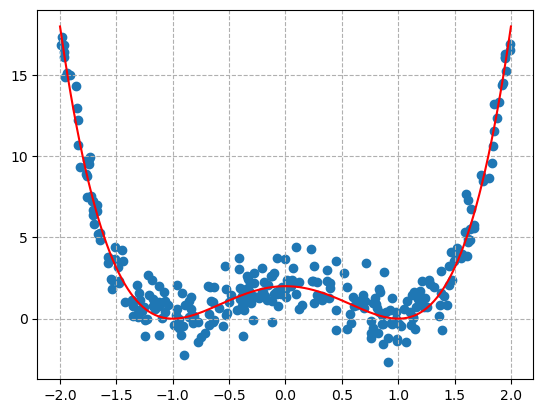

In [1616]:
## Initialize the parameters
a = 2
x0 = 1
x = np.random.uniform(-2,2,300)
epsilon = np.random.normal(0,1,300)
y = a*(x**2-x0**2)**2 + epsilon
x_lin = np.linspace(-2,2,300)
y_quart = a*(x_lin**2-x0**2)**2

## Now plot 
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x_lin,y_quart,color='red')
ax.grid(linestyle='--')

In [1595]:
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# Reshape tensors to be [batch_size, num_features]
# The model's linear layers expect a 2D tensor.
# We have 300 samples, each with 1 feature.
x_tensor = x_tensor.view(300, 1)
y_tensor = y_tensor.view(300, 1)


# Define model parameters
input_dim = 1    # Each data point is a single 'x' value
hidden_dim = 128  # Number of neurons in the hidden layers
output_dim = 1   # We are predicting a single 'y' value

Epoch [100/200], Loss: 0.9917
Epoch [200/200], Loss: 0.9625


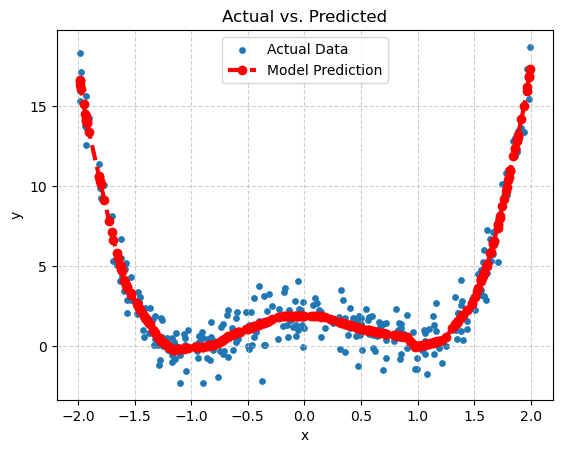

In [1610]:
# Start the model
model = SimpleNet(input_dim, hidden_dim, output_dim)

# Define the Loss Function (Mean Squared Error for least squares)
criterion = nn.MSELoss()

# Define the Optimizer (ADAM)
# We pass the model's parameters and a learning rate lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 200 # Number of times to iterate over the entire dataset

## Start the loop
for epoch in range(epochs):
    # Set the model to training mode
    model.train()

    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor) ## Compute loss

    #Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad() # Clear existing gradients
    loss.backward()       # Calculate new gradients
    optimizer.step()      # Update weights

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



# Set the model to evaluation mode
model.eval()

# Get predictions from the trained model
with torch.no_grad(): # No need to calculate gradients for this part
    predicted = model(x_tensor).detach().numpy()

# Plot the results
# Sort values for a clean line plot
sort_indices = np.argsort(x)
plt.scatter(x[sort_indices], y[sort_indices], s=15, label='Actual Data')
plt.plot(x[sort_indices], predicted[sort_indices], '--o', color='red', lw=3, label='Model Prediction')
plt.title('Actual vs. Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In this example, the deep neural network is doing nonparameteric curve fitting (because we never defined what the actual function was). 
What this means is that the weights and biases DO NOT represent the values of $a$ and $x_0$, but represent the weights ReLU functions that make it up. Each layer of the network adds a level of abstraction to what the weights are supposed to represent. Now let us attempt to get the weights

In [1599]:
# Print the model's state dictionary
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
layer1.weight 	 torch.Size([128, 1])
layer1.bias 	 torch.Size([128])
layer2.weight 	 torch.Size([128, 128])
layer2.bias 	 torch.Size([128])
layer3.weight 	 torch.Size([128, 128])
layer3.bias 	 torch.Size([128])
layer4.weight 	 torch.Size([128, 128])
layer4.bias 	 torch.Size([128])
layer5.weight 	 torch.Size([1, 128])
layer5.bias 	 torch.Size([1])


In [1755]:
# Get the weights of the first linear layer
first_layer_weights = model.state_dict()['layer1.weight']
print("\nWeights of the first layer:")
print(first_layer_weights)


Weights of the first layer:
tensor([[-0.0039],
        [ 0.0088],
        [ 0.0075],
        [-0.0011]])


Now that we have a basic understanding of what our model does, we would like to begin initializing the weights how we would like. 
To save ourselves a bit of trouble, we will define a general neural network that can take in an arbitrary number of hidden layers 
and activations

In [1832]:
## We want to add more layers without having to manually add the ridiculous amount of layers

class GenNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_hidden_layers, activation_fn=nn.ReLU): ## Change activation if needed
        """
        Initializes a dynamic neural network.

        Args:
            input_size (int): The number of input features.
            hidden_size (int): The number of neurons in each hidden layer.
            output_size (int): The number of output neurons.
            num_hidden_layers (int): The number of hidden layers to create.
            activation_fn (nn.Module): The activation function class to use (e.g., nn.ReLU, nn.LeakyReLU).
        """
        super(GenNet, self).__init__()

        # Create a list to hold all the layers
        layers = []

        # Add the input layer
        # This layer maps from the input size to the first hidden size
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(activation_fn())

        # Add the hidden layers in a loop
        for _ in range(num_hidden_layers):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(activation_fn()) ## arbitrary activation function but we will be using ReLU
            

        # Add the output layer
        # This layer maps from the last hidden size to the output size
        layers.append(nn.Linear(hidden_size, output_size))

        # Create the sequential model
        # The '*' unpacks the list of layers into arguments for nn.Sequential
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        """
        The forward pass is now handled entirely by the nn.Sequential container.
        """
        return self.network(x) ## The self.network was defined in the previous function. Sequential has already taken care of it for us

def init_weights(m,var):
    """
    Initializes weights of linear layers as a normal random variables
    """
    # Check if the module is an instance of a linear layer
    if isinstance(m, nn.Linear):
        # nn has a built in weight initialization method, it is called nn.init. ... followed by whatever distribution
        nn.init.normal_(m.weight,0,var)
        
        # Initialize all biases to zero 
        nn.init.zeros_(m.bias)
        
        ## You can print it out if you want 
        #print(f"Initialized weights for: {m}")


In [1844]:
## Initialize the parameters
var = 10e-5
input_dim = 1
hidden_dim = 4
output_dim = 1

# start the model
model = GenNet(input_size=1, hidden_size=32, output_size=1,num_hidden_layers=4, activation_fn=nn.ReLU)

print("Weights before custom initialization:")
print(model.state_dict()['network.2.weight'])

# Apply the custom weight initialization function
print("\n Applying custom initialization")
model.apply(lambda m: init_weights(m, var))

print("\n Weights after custom initialization")
print('layer 1:',model.state_dict()['network.2.weight'])

Weights before custom initialization:
tensor([[-1.7590e-02, -1.1930e-01,  1.2854e-01,  ...,  7.8336e-02,
         -7.5560e-02,  2.7618e-02],
        [ 1.6178e-01,  7.0413e-02,  1.6772e-01,  ..., -5.2159e-02,
         -1.6357e-01, -2.2822e-02],
        [-5.7863e-03,  1.5440e-03,  1.1333e-01,  ...,  1.0368e-01,
          4.2827e-03, -1.5646e-02],
        ...,
        [-1.4832e-01,  1.5501e-01, -1.3291e-01,  ...,  9.1828e-02,
          9.7468e-02,  7.2566e-02],
        [ 8.6711e-02, -1.4011e-01, -4.1270e-02,  ..., -3.0152e-02,
         -9.4573e-03, -9.2794e-02],
        [ 6.3228e-02,  1.6013e-01,  1.0150e-01,  ...,  2.1303e-02,
         -7.9796e-02, -7.2092e-05]])

 Applying custom initialization

 Weights after custom initialization
layer 1: tensor([[-2.7319e-05,  2.0282e-05,  5.6567e-05,  ..., -8.8153e-05,
          2.6689e-04,  3.9593e-05],
        [-4.5577e-06, -5.6406e-05,  4.3807e-05,  ...,  1.4849e-05,
          1.0509e-04, -1.3253e-04],
        [-5.8702e-05,  9.5873e-05,  1.4422e-

Now look at the variance of the activation across each layer and put them into a list

In [1847]:
## We need a way to extract the values of the activations. Fortunately, PyTorch has a neat way of doing this
activations_hook = {}

def get_activation(name):
    """ This is a closure that returns our hook function """
    def hook(model, input, output):
        # Store the output tensor in our dictionary
        activations_hook[name] = output.detach()
    return hook

# Register a forward hook for each layer in the sequential model
for i, layer in enumerate(model.network):
    layer.register_forward_hook(get_activation(f'layer_{i}'))
    
# Run the forward pass
final_output_hook = model(x_tensor)

In [1849]:
variances = []
for name, activation in activations_hook.items():
    variances += [np.var(activation.numpy())]
variances = variances[::2]

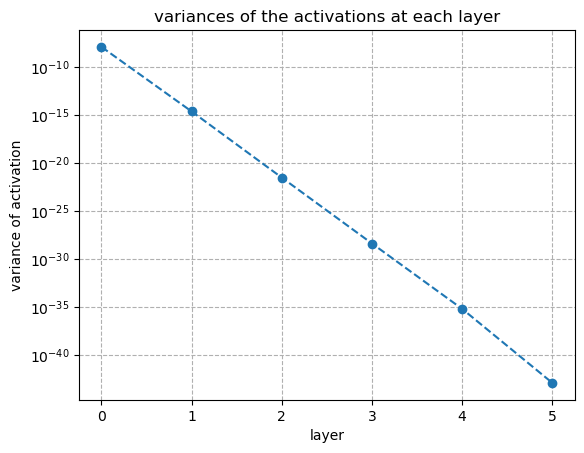

In [1851]:
plt.plot(variances,'--o')
plt.grid(linestyle='--')
plt.title('variances of the activations at each layer')
plt.xlabel('layer')
plt.ylabel('variance of activation')
plt.yscale('log')

At each layer, the variance of the weights decay very rapidly! In fact, for different values of the initial variance, we see very different effects 

In [1887]:
vars = [1,.1,.02,.01,.001]
activationvars = {}

for var in vars:
    model = GenNet(input_size=1, hidden_size=32, output_size=1,num_hidden_layers=6, activation_fn=nn.ReLU)
    model.apply(lambda m: init_weights(m, var))
    for i, layer in enumerate(model.network):
        layer.register_forward_hook(get_activation(f'layer_{i}'))
        
    activations_hook = {}
    # Run the forward pass
    final_output_hook = model(x_tensor)
    variances = []
    for name, activation in activations_hook.items():
        variances += [np.log(np.var(activation.numpy()))]
    variances = variances[::2]
    activationvars[str(round(var,3))] = variances

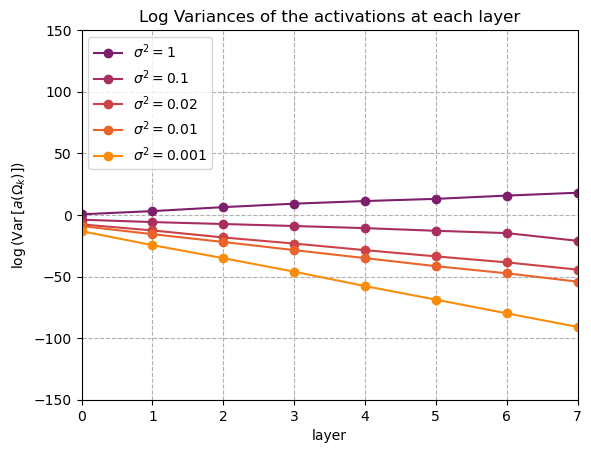

In [2045]:
import matplotlib.cm as cm
cmap = matplotlib.colormaps.get_cmap('inferno')
i = .25
for var in vars:
    data = activationvars[str(round(var,3))]
    i += .1
    color_val = i 
    plot_color = cmap(color_val)
    plt.plot(data,'-o',color = plot_color,label=r"$\sigma^2= $"+str(round(var,3)))
plt.legend(loc='upper left')
plt.ylim(-150,150)
plt.xlim(0,7)
plt.grid(linestyle='--')
plt.title('Log Variances of the activations at each layer')
plt.xlabel('layer')
plt.ylabel(r'$\log \left(\operatorname{Var}\left[a(\Omega_k)\right]\right)$')
plt.savefig("ExplodingGrad.png")